<a href="https://colab.research.google.com/github/evanreppeto/AIProject/blob/main/Copy_of_AI_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imghdr
import cv2
from tensorflow. keras.layers import Dense, Flatten, Activation, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow. keras.models import Sequential
from tensorflow. keras.models import load_model
from tensorflow. keras.optimizers import Adam, SGD

<ipython-input-1-a582af57eb5d>:6: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
Data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/AI Project Data (merged)')
data_iterator = Data.as_numpy_iterator()
batch = data_iterator.next()

Found 8211 files belonging to 8 classes.


In [7]:
#normalizing orparation
Data = Data.map(lambda x,y: (x/255, y))

#split the data set(75:15:10)
train_size = int(len(Data)*.75)
val_size = int(len(Data)*.15)
test_size = int(len(Data)*.1)

train = Data.take(train_size)
val = Data.skip(train_size).take(val_size)
test = Data.skip(train_size+val_size).take(test_size)

In [8]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(256,256,3))

# train_datagen = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=20,
#     zoom_range=0.15,
#     horizontal_flip=True
# )

# Define data augmentation layer
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
])

model = Sequential([
  #data_augmentation,
  base_model,
  GlobalAveragePooling2D(),
  Dense(258, activation='relu'),
  Dense(256, activation='relu'),
  Dense(8, activation='softmax')
])

opt = SGD(learning_rate=0.001, momentum = 0.9)
model.compile(optimizer=opt, loss=tf.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
#model.build(input_shape=(None, 256, 256, 3))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 8, 8, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 258)            │       132,354 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        66,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │         2,056 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,915,402 (56.90 MB)

 Trainable params: 14,915,402 (56.90 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# TRIAL
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# Load base model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
base_model.trainable = False  # Phase 1: Freeze VGG16 layers

# Data augmentation + normalization
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.Rescaling(1./255)
])

# Full model definition
model = Sequential([
    data_augmentation,
    base_model,
    GlobalAveragePooling2D(),
    Dense(258, activation='relu'),
    Dropout(0.3),  # Helps prevent overfitting
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(8, activation='softmax')  # Change if class count is different
])

# Use Adam optimizer for better generalization
opt = Adam(learning_rate=0.0001)

# Compile model
model.compile(optimizer=opt,
              loss=tf.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_2 (Sequential)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 8, 8, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ ?                      │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
import datetime
import tensorflow as tf

logdir = 'Logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

full_loss = []
full_val_loss = []
full_acc = []
full_val_acc = []

total_epochs = 80
save_interval = 10

for epoch in range(0, total_epochs, save_interval):
    print(f"Training epochs {epoch + 1} to {epoch + save_interval}...")

    hist = model.fit(
        train,
        initial_epoch=epoch,
        epochs=epoch + save_interval,
        validation_data=val,
        callbacks=[tensorboard_callback]
    )

    # Save history metrics
    full_loss.extend(hist.history['loss'])
    full_val_loss.extend(hist.history['val_loss'])
    full_acc.extend(hist.history['accuracy'])
    full_val_acc.extend(hist.history['val_accuracy'])

    # Save model
    date_stamp = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
    file_name = f"/content/drive/MyDrive/New Data/model_epoch{epoch + save_interval}_{date_stamp}.h5"
    model.save(file_name)
    print(f"Model saved at epoch {epoch + save_interval}: {file_name}")

Training epochs 1 to 10...
Epoch 1/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - accuracy: 0.1610 - loss: 2.0740

In [ ]:
# === Phase 2: Fine-tune VGG16 top layers ===
print("\nStarting Phase 2: Fine-tuning VGG16 top layers...\n")

# Unfreeze top 4 layers of VGG16
base_model.trainable = True
for layer in base_model.layers[:-4]:
    layer.trainable = False

# Recompile the model with a smaller learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss=tf.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# === Continue Training ===
for epoch in range(total_epochs, total_epochs + 30, save_interval):
    print(f"Training epochs {epoch + 1} to {epoch + save_interval} (Fine-tuning)...")

    hist = model.fit(
        train,
        initial_epoch=epoch,
        epochs=epoch + save_interval,
        validation_data=val,
        callbacks=[tensorboard_callback]
    )

    # Save fine-tuning history
    full_loss.extend(hist.history['loss'])
    full_val_loss.extend(hist.history['val_loss'])
    full_acc.extend(hist.history['accuracy'])
    full_val_acc.extend(hist.history['val_accuracy'])

    # Save fine-tuned model
    date_stamp = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
    file_name = f"/content/drive/MyDrive/New Data/model_epoch{epoch + save_interval}_{date_stamp}_finetuned.h5"
    model.save(file_name)
    print(f"Fine-tuned model saved at epoch {epoch + save_interval}: {file_name}")

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image_dataset_from_directory

# === Load Dataset ===
train_dir = '/content/drive/MyDrive/AI Project Data (Merged)'  # adjust this
batch_size = 32
img_size = (256, 256)

train = image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset='training',
    seed=42,
    image_size=img_size,
    batch_size=batch_size
)

val = image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset='validation',
    seed=42,
    image_size=img_size,
    batch_size=batch_size
)

# === Model Setup ===
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
base_model.trainable = False  # freeze everything

model = Sequential([
    tf.keras.layers.Rescaling(1./255),
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dense(8, activation='softmax')  # set to your number of classes
])

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# === Phase 1 Training (Frozen VGG16) ===
model.fit(train, validation_data=val, epochs=10)

Found 7449 files belonging to 8 classes.
Using 5960 files for training.
Found 7449 files belonging to 8 classes.
Using 1489 files for validation.
Epoch 1/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 98s 501ms/step - accuracy: 0.1558 - loss: 2.0295 - val_accuracy: 0.2357 - val_loss: 1.9346
Epoch 2/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 98s 281ms/step - accuracy: 0.2641 - loss: 1.9223 - val_accuracy: 0.2364 - val_loss: 1.8997
Epoch 3/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 52s 278ms/step - accuracy: 0.2954 - loss: 1.8872 - val_accuracy: 0.2814 - val_loss: 1.8698
Epoch 4/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 93s 336ms/step - accuracy: 0.3336 - loss: 1.8558 - val_accuracy: 0.3392 - val_loss: 1.8425
Epoch 5/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 82s 334ms/step - accuracy: 0.3799 - loss: 1.8264 - val_accuracy: 0.3546 - val_loss: 1.8164
Epoch 6/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 82s 333ms/step - accuracy: 0.3893 - loss: 1.7990 - val_accuracy: 0.4211 - val_loss: 1.7909
Epoch 7/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 82s 336ms/step - accuracy: 0

In [ ]:
# === Unfreeze top layers for fine-tuning ===
base_model.trainable = True
for layer in base_model.layers[:-4]:  # only unfreeze top 4 layers
    layer.trainable = False

# Recompile with smaller learning rate
model.compile(optimizer=Adam(1e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Continue training
model.fit(train, validation_data=val, epochs=10)

Epoch 1/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 76s 378ms/step - accuracy: 0.5244 - loss: 1.5259 - val_accuracy: 0.6394 - val_loss: 1.2517
Epoch 2/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 76s 367ms/step - accuracy: 0.6761 - loss: 1.1256 - val_accuracy: 0.6756 - val_loss: 1.0060
Epoch 3/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 82s 365ms/step - accuracy: 0.7126 - loss: 0.9151 - val_accuracy: 0.6938 - val_loss: 0.9149
Epoch 4/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 68s 364ms/step - accuracy: 0.7343 - loss: 0.8088 - val_accuracy: 0.7018 - val_loss: 0.8776
Epoch 5/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 73s 314ms/step - accuracy: 0.7458 - loss: 0.7422 - val_accuracy: 0.7079 - val_loss: 0.8334
Epoch 6/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 91s 365ms/step - accuracy: 0.7702 - loss: 0.6865 - val_accuracy: 0.7206 - val_loss: 0.8089
Epoch 7/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 82s 366ms/step - accuracy: 0.7801 - loss: 0.6476 - val_accuracy: 0.7233 - val_loss: 0.8026
Epoch 8/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 82s 365ms/step - accuracy: 0.7908 - loss: 0

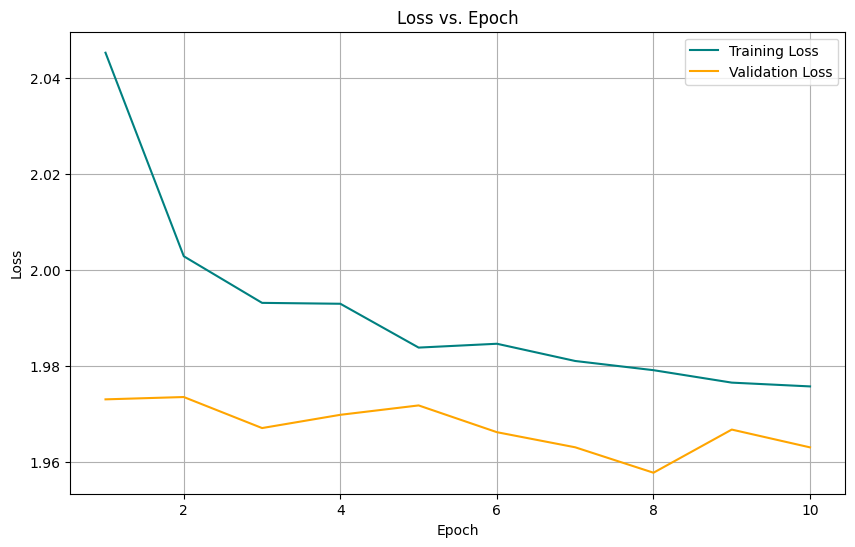

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(full_loss)+1), full_loss, label='Training Loss', color='teal')
plt.plot(range(1, len(full_val_loss)+1), full_val_loss, label='Validation Loss', color='orange')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs. Epoch")
plt.legend()
plt.grid(True)
plt.show()

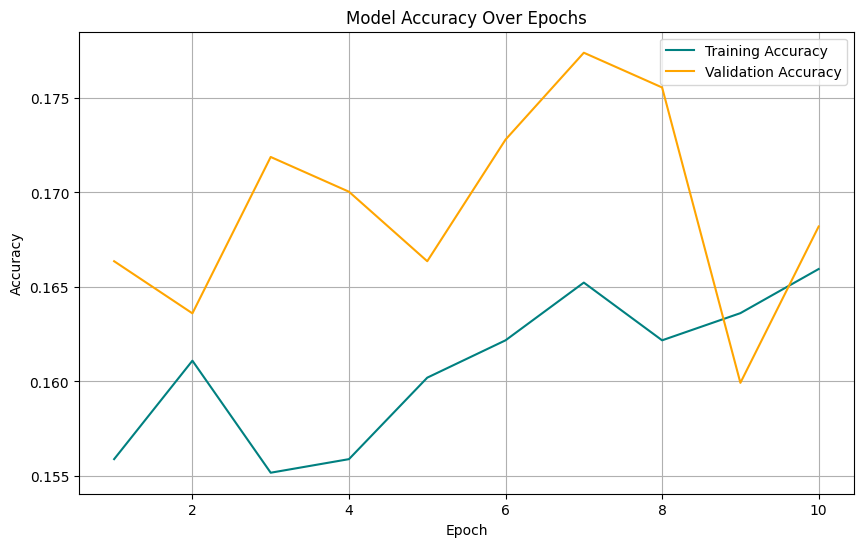

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(full_acc) + 1)

# Accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, full_acc, label='Training Accuracy', color='teal')
plt.plot(epochs, full_val_acc, label='Validation Accuracy', color='orange')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Over Epochs")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
new_model = load_model('/content/drive/MyDrive/New Data/model_epoch25_2025-04-14_02-16-46.h5')

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

pre = Precision()
re = Recall()
acc = CategoricalAccuracy()  # Use CategoricalAccuracy for multi-class

for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = new_model.predict(X)

    # Convert y to one-hot encoding for CategoricalAccuracy
    y = tf.keras.utils.to_categorical(y, num_classes=8)

    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

print("Precision:", pre.result().numpy())
print("Recall:", re.result().numpy())
print("Accuracy:", acc.result().numpy())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
Precision: 0.6880734
Recall: 0.63920456
Accuracy: 0.6448864


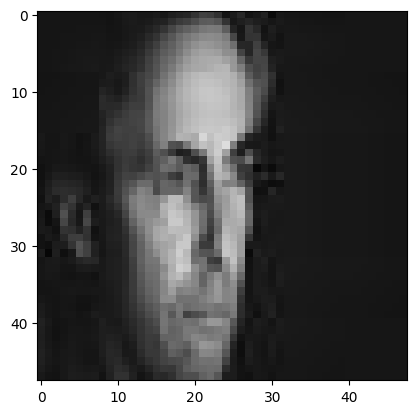

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
[[2.1755699e-02 3.2303942e-05 1.7809242e-04 5.7618339e-03 1.1631999e-03
  1.5536498e-03 9.6703523e-01 2.5200276e-03]]
Sadness


In [ ]:
#testing pipeline
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imghdr
test_img = cv2.imread('/content/drive/MyDrive/AI Project Data/sadness/621462.jpg')
plt.imshow(cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB))
plt.show()

test_img = cv2.resize(test_img, (256,256))
test_img = test_img/255.0
test_img = np.expand_dims(test_img, 0)
test_predicton = model.predict(test_img)

print(test_predicton)
if np.argmax(test_predicton) == 0:
  print('Anger')
elif np.argmax(test_predicton) == 1:
  print('Contempt')
elif np.argmax(test_predicton) == 2:
  print('Disgust')
elif np.argmax(test_predicton) == 3:
  print('Fear')
elif np.argmax(test_predicton) == 4:
  print('Happy')
elif np.argmax(test_predicton) == 5:
  print('Neutral')
elif np.argmax(test_predicton) == 6:
  print('Sadness')
elif np.argmax(test_predicton) == 7:
  print('Surprise')